In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle

In [156]:
! cp kaggle.json ~/.kaggle/

In [157]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d heptapod/titanic

  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 4.05MB/s]


In [158]:
from zipfile import ZipFile

with ZipFile("/content/titanic.zip",'r') as ref:
  ref.extractall()



---



In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
data = pd.read_csv("/content/train_and_test2.csv")
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [161]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.865560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [162]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengerid,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Age,1309.0,29.503186,12.905241,0.17,22.0000,28.0000,35.000,80.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292
Sex,1309.0,0.355997,0.478997,0.00,0.0000,0.0000,1.000,1.0000
sibsp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
zero,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.1,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.2,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.3,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.4,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000


#### Checking for null values

In [163]:
data.isnull().sum().any()

True

In [164]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [165]:
data.Embarked.value_counts()

2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64

In [166]:
data.Embarked.mode()

0    2.0
dtype: float64

In [167]:
data.Embarked = data.Embarked.fillna(0)

In [168]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
2urvived       0
dtype: int64

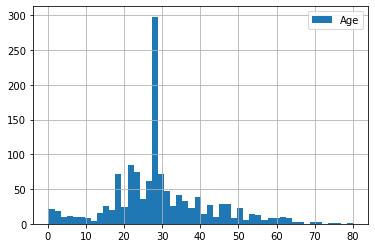

In [186]:
data.Age.hist(bins=50, legend=1)

plt.show()

### Checking for imbalanced data

In [169]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [170]:
data.rename({"2urvived":"Survived"},axis=1, inplace=True)

In [171]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [172]:
# sur = list()
# not_sur = list()

In [173]:
sur = data[data['Survived'] == 1].shape[0]

sur

342

In [174]:
# sur = [i for i in range(1,sur+1)]
# print(sur)

In [175]:
not_sur = data[data['Survived'] == 0].shape[0]

not_sur

967

In [176]:
# not_sur = [i for i in range(1,not_sur+1)]

# print(not_sur)

In [ ]:
# sur = np.asarray(sur)
# not_sur = np.asarray(not_sur)

In [ ]:
LABELS = ['Not Survived','Survived']

In [ ]:
count_classes = pd.value_counts(data['Survived'], sort = True)

count_classes

0    967
1    342
Name: Survived, dtype: int64

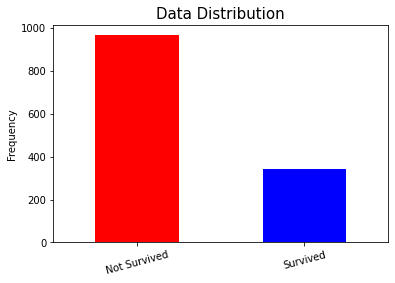

In [ ]:
count_classes.plot(kind = 'bar', rot=15, color=['red','b'],)
plt.title("Data Distribution",size=15)
plt.xticks(range(2), labels = LABELS)
plt.ylabel("Frequency")
plt.show()

### **Above graph show total survived and not survived**

### Pie chart

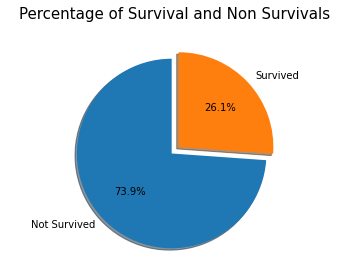

In [ ]:
plt.pie(count_classes, labels=LABELS, shadow=True, autopct = '%0.1f%%', explode=[0,0.1], startangle=90)
plt.title("Percentage of Survival and Non Survivals\n",size=15)
plt.axis('Equal')
plt.show()



---



### Gender wise data distribution

In [ ]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
gen_counts = pd.value_counts(data['Sex'],)

In [ ]:
gen_counts

0    843
1    466
Name: Sex, dtype: int64

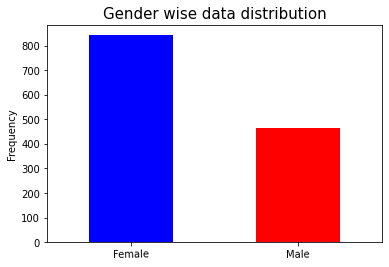

In [ ]:
gen_counts.plot(kind='bar', rot=1, color=['b','r'])
plt.xticks(range(2), labels=['Female','Male'])
plt.ylabel("Frequency")
plt.title("Gender wise data distribution", size=15)
plt.show()

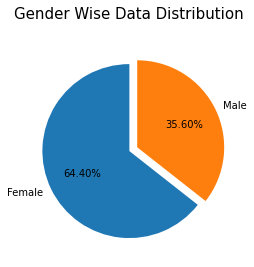

In [ ]:
plt.pie(gen_counts, labels=['Female','Male'], explode=[0,0.1], startangle=90, autopct="%0.2f%%")
plt.title("Gender Wise Data Distribution\n", size=15)
plt.show()

### Now to check who survived most Male or Female

In [ ]:
survived_data = data[data['Survived'] == 1]
survived_data.shape

(342, 28)

In [ ]:
gen_survived = pd.value_counts(survived_data.Sex, sort=True)
gen_survived

1    233
0    109
Name: Sex, dtype: int64

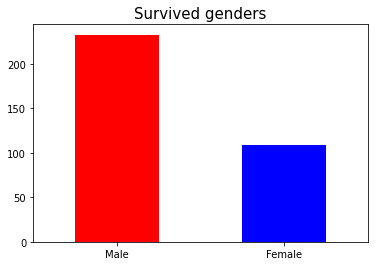

In [ ]:
gen_survived.plot(kind='bar', rot=0, color=['r','b'])
plt.title("Survived genders", size=15)
plt.xticks(range(2), labels=['Male', "Female"])
plt.show()

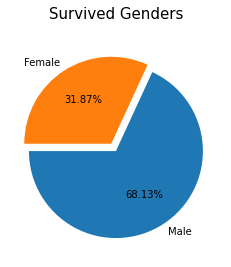

In [ ]:
plt.pie(gen_survived, labels=['Male','Female'],autopct="%0.2f%%", startangle=180, explode=[0,0.1])
plt.title("Survived Genders\n", size=15)
plt.show()

### Now to check who died most Male or Female

In [ ]:
not_Servived_Data = data[data['Survived'] == 0]
not_Servived_Data.shape

(967, 28)

In [ ]:
not_Servived_Data = pd.value_counts(not_Servived_Data['Sex'])
not_Servived_Data

0    734
1    233
Name: Sex, dtype: int64

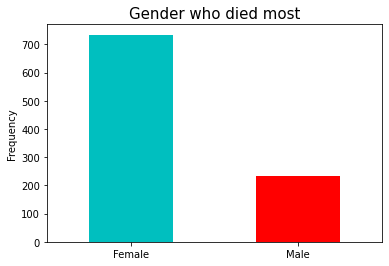

In [ ]:
not_Servived_Data.plot(kind='bar',rot=0, color=['c','r'])
plt.title("Gender who died most", size=15)
plt.xticks(range(2), labels=['Female','Male'])
plt.ylabel("Frequency")
plt.show()

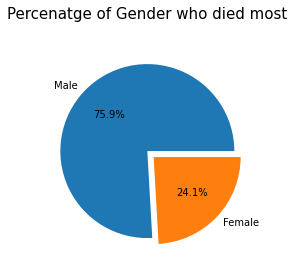

In [ ]:
plt.pie(not_Servived_Data, labels=['Male',"Female"], autopct="%0.1f%%", explode=[0,.1])
plt.title("Percenatge of Gender who died most\n", size=15)

plt.show()

### Analyzing Passenger's Class

In [ ]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', 'Survived'],
      dtype='object')

In [ ]:
data.rename({"Pclass":"Passenger_Class"}, axis=1, inplace=1)

In [ ]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Passenger_Class', 'zero.15', 'zero.16', 'Embarked',
       'zero.17', 'zero.18', 'Survived'],
      dtype='object')

In [ ]:
data.Passenger_Class.unique() 

array([3, 1, 2])

In [ ]:
data[data.Passenger_Class == 1].shape

(323, 28)

In [ ]:
data[data.Passenger_Class == 2].shape

(277, 28)

In [ ]:
data[data.Passenger_Class == 3].shape

(709, 28)

In [ ]:
data.shape[0] == data[data.Passenger_Class == 1].shape[0] + data[data.Passenger_Class == 2].shape[0] + data[data.Passenger_Class == 3].shape[0]

True

In [ ]:
# --------------------------------------------------------------------------------------

In [ ]:
p_class = data.Passenger_Class.value_counts()
p_class

3    709
1    323
2    277
Name: Passenger_Class, dtype: int64

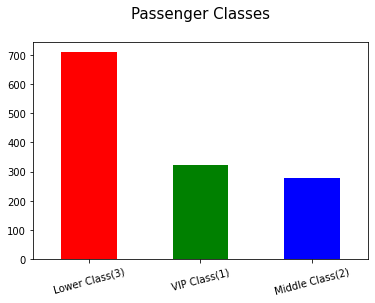

In [ ]:
p_class.plot(kind='bar',rot=15, color = ['r','g','b'])
plt.xticks(range(3), labels=['Lower Class(3)','VIP Class(1)','Middle Class(2)'])
plt.title("Passenger Classes\n", size=15)
plt.show()

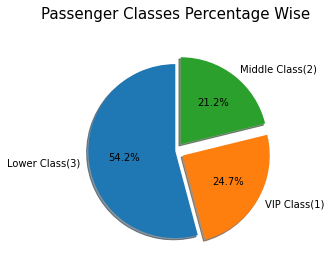

In [ ]:
plt.pie(p_class,explode=[0,0.1,.1],
        labels=['Lower Class(3)','VIP Class(1)','Middle Class(2)'],shadow=True,
        autopct='%0.1f%%', startangle=90,radius=1)
plt.title("Passenger Classes Percentage Wise\n", size=15)
plt.show()



---
#### Now to find how many **VIP, MIDDLE, LOWER** class people who survived


In [ ]:
data.head(2)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Passenger_Class,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1


In [ ]:
vip_sur = data[(data.Passenger_Class == 1) & (data.Survived == 1)]
vip_sur.tail()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Passenger_Class,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
862,863,48.0,25.9292,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
871,872,47.0,52.5542,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
879,880,56.0,83.1583,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
887,888,19.0,30.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
889,890,26.0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1


In [ ]:
vip_sur.shape

(136, 28)

In [ ]:
vip_sur.Passenger_Class.unique()

array([1])

In [ ]:
vip_sur = vip_sur.Sex.value_counts()
vip_sur

1    91
0    45
Name: Sex, dtype: int64

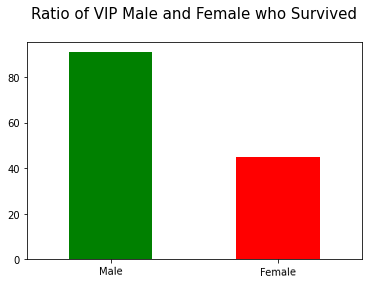

In [ ]:
vip_sur.plot(kind='bar', color=['g','r'], rot=1)
plt.xticks(range(2), labels=['Male','Female'])
plt.title("Ratio of VIP Male and Female who Survived\n", size=15)
plt.show()


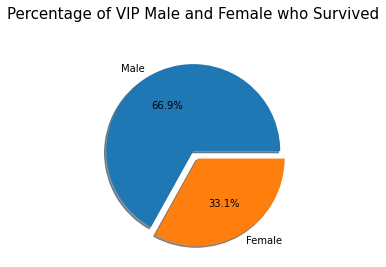

In [ ]:
plt.pie(vip_sur, labels=['Male','Female'], autopct="%.1f%%",explode=[0,0.1],shadow=True)

plt.title("Percentage of VIP Male and Female who Survived\n", size=15)
plt.show()

In [ ]:
# -------------------------------------------------------------------

In [ ]:
middle_sur = data[(data['Passenger_Class'] == 2) & (data.Survived == 1)]
middle_sur.tail()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Passenger_Class,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
831,832,0.83,18.7500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,2.0,0,0,1
865,866,42.00,13.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2.0,0,0,1
866,867,27.00,13.8583,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0.0,0,0,1
874,875,28.00,24.0000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0.0,0,0,1
880,881,25.00,26.0000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,2.0,0,0,1


In [ ]:
middle_sur.shape

(87, 28)

In [ ]:
middle_sur = middle_sur.Sex.value_counts()
middle_sur

1    70
0    17
Name: Sex, dtype: int64

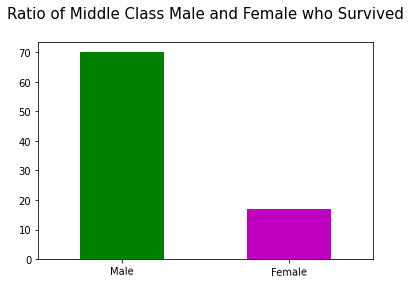

In [ ]:
middle_sur.plot(kind='bar',rot=1, color=['g','m'])
plt.xticks(range(2), labels=['Male','Female'])
plt.title("Ratio of Middle Class Male and Female who Survived\n", size=15)
plt.show()

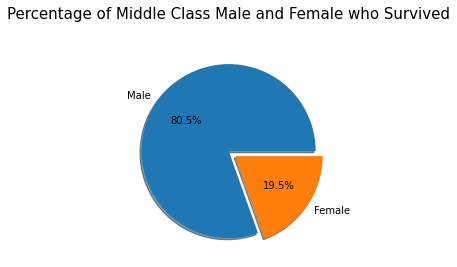

In [ ]:
plt.pie(middle_sur, labels=['Male','Female'], explode=[0,0.1], shadow=True, autopct='%.1f%%')
plt.title("Percentage of Middle Class Male and Female who Survived\n", size=15)
plt.show()

In [ ]:
# ---------------------------------------------------------------------------

In [ ]:
lower_sur = data[(data.Passenger_Class == 3) & (data.Survived == 1)]
lower_sur.tail() 

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Passenger_Class,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
838,839,32.0,56.4958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
855,856,18.0,9.3500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
858,859,24.0,19.2583,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,0.0,0,0,1
869,870,4.0,11.1333,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
875,876,15.0,7.2250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0.0,0,0,1


In [ ]:
lower_sur.shape

(119, 28)

In [ ]:
lower_sur = pd.value_counts(lower_sur.Sex)
lower_sur

1    72
0    47
Name: Sex, dtype: int64

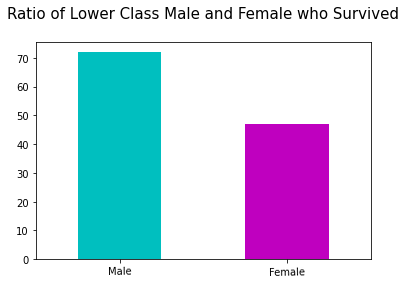

In [ ]:
lower_sur.plot(kind='bar', rot=1, color=['c','m'])
plt.xticks(range(2), labels=['Male','Female'])
plt.title("Ratio of Lower Class Male and Female who Survived\n", size=15)
plt.show()


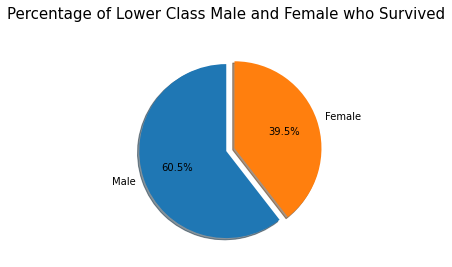

In [ ]:
plt.pie(lower_sur, labels=['Male','Female'], explode=[0,0.1], autopct='%0.1f%%', shadow=True, startangle=90)
plt.title("Percentage of Lower Class Male and Female who Survived\n", size=15)
plt.show()

### Now finding many childs are in Titanic and how much of them survived and not survived

In [ ]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Passenger_Class,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
 data.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 , 18.5 ,
       67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [ ]:
child_sub_data = data[data.Age < 12.0]

child_sub_data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Passenger_Class,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
7,8,2.0,21.0750,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
10,11,4.0,16.7000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
16,17,2.0,29.1250,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,1.0,0,0,0
24,25,8.0,21.0750,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
43,44,3.0,41.5792,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0.0,0,0,1


In [ ]:
child_sub_data.shape

(91, 28)

In [ ]:
c_sub_data = child_sub_data.Sex.value_counts()
c_sub_data

0    49
1    42
Name: Sex, dtype: int64

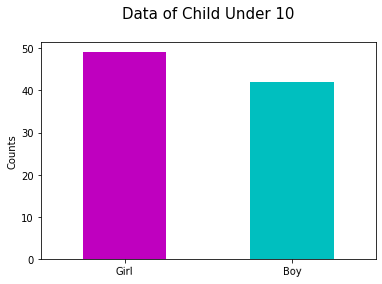

In [ ]:
c_sub_data.plot(kind='bar', rot=1, color=['m','c'])
plt.title('Data of Child Under 10\n', size=15)
plt.xticks(range(2), labels=['Girl','Boy'])
plt.ylabel("Counts")
plt.show()

In [ ]:
# ----------------------------------------------------

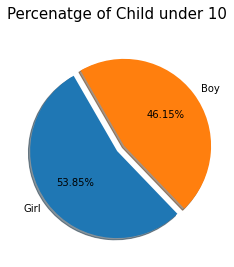

In [ ]:
plt.pie(c_sub_data, explode=[0,.1],
        labels=["Girl","Boy"],
        autopct="%.2f%%",
        shadow=True,
        startangle=120)

plt.title("Percenatge of Child under 10\n", size=15)
plt.show()

In [ ]:
# -------------------------------------------------------------

### Survival from above data

In [ ]:
sur_child = child_sub_data[child_sub_data.Survived == 1]

sur_child.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Passenger_Class,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
10,11,4.00,16.7000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
43,44,3.00,41.5792,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0.0,0,0,1
58,59,5.00,27.7500,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,2.0,0,0,1
78,79,0.83,29.0000,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,2.0,0,0,1
165,166,9.00,20.5250,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1


In [ ]:
sur_child.shape

(39, 28)

In [ ]:
sur_child = sur_child.Sex.value_counts()
sur_child

0    20
1    19
Name: Sex, dtype: int64

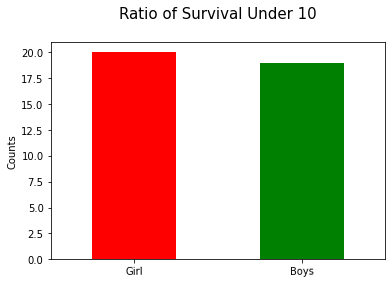

In [ ]:
sur_child.plot(kind='bar', rot=1, color=['r','g'])
plt.xticks(range(2), labels=['Girl','Boys'])
plt.title("Ratio of Survival Under 10\n", size=15)
plt.ylabel("Counts")
plt.show()

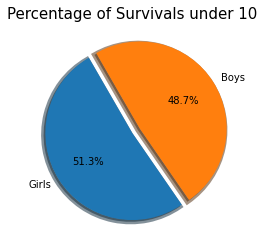

In [ ]:
plt.pie(sur_child, explode=[0,0.1],
        labels=['Girls','Boys'],
        autopct='%.1f%%',
        shadow=1,
        startangle=120,
        wedgeprops = {'linewidth': 5})

plt.title('Percentage of Survivals under 10', size=15)
plt.show()

### Correlation

In [ ]:
numerical_data = data.iloc[::,[1,3,-1]]

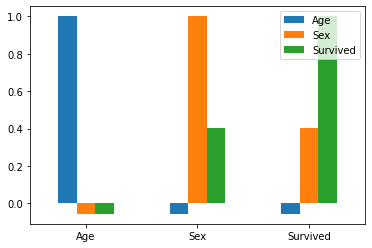

In [ ]:
numerical_data.corr().plot(kind='bar', rot=0)
plt.show()